PCA FOR DIMENSINALITY REDUCTION

In [51]:
# Mnist dataset:
'''
MNIST dataset is the dataset of handwritten digits in which we have to predict
the digits according to the pixel values.
'''
import pandas as pd
df=pd.read_csv('/content/train.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df.fillna(0,inplace=True)

In [53]:
# one image consist of 28x28 pixels

df.shape

(42000, 785)

In [54]:

# the first label consist digit number
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
39539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


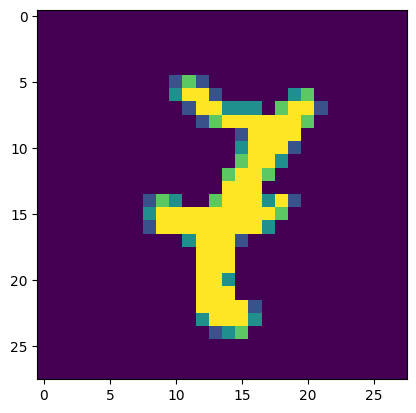

In [55]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[1065,1:].values.reshape(28,28))

In [56]:
# splitting data in x and y

x=df.iloc[:,1:]
y=df.iloc[:,0]

In [57]:
# splitting data in test and training

from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)  # keeping random state 42 means that there will be sam esplitting every time

In [59]:
x_train.shape

(33600, 784)

In [60]:
# first with an algorithm other than PCA

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [62]:
import time
start=time.time()
y_pred=knn.predict(x_test)
print(time.time()-start)

19.22655701637268


In [63]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc


0.9648809523809524

NOW USE PCA

In [64]:
# scaling our data

In [65]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [66]:
from sklearn.decomposition import PCA
pca=PCA(n_components=100)

In [67]:
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

In [68]:
x_train.shape

(33600, 784)

In [70]:
x_train_pca.shape

(33600, 100)

In [74]:
knn=KNeighborsClassifier()
knn.fit(x_train_pca,y_train)
y_pred=knn.predict(x_test_pca)

In [76]:
acc=accuracy_score(y_test,y_pred)
acc

0.9544047619047619